# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://www.kaggle.com/c/titanic/data) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [13]:
%matplotlib inline
import numpy as np # Canonical import
import pandas as pd
import matplotlib

❓ Run `!ls -lh` to list files in the current folder. You should see a `.csv` file.

In [14]:
 !ls -lh

total 80K
-rw-r--r-- 1 florent florent 2.0K Oct 12 15:17 README.md
-rw-r--r-- 1 florent florent  16K Oct 19 17:14 reboot.ipynb
-rw-r--r-- 1 florent florent  60K Oct 12 15:17 titanic.csv


❓ Load the CSV data as a into a `titanic_df` variable.

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [15]:
titanic_df = pd.read_csv('titanic.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [16]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [17]:
titanic_df.drop(columns = 'Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Classes Analysis

Let's have a look at the ticket repartition.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [21]:
test = titanic_df.groupby('Pclass')
pclass_df = test['Pclass'].sum()
pclass_df

Pclass
1     216
2     368
3    1473
Name: Pclass, dtype: int64

to figure out
pclass_df2 = titanic_df["PassengerID", "Pclass"].groupby('Pclass').sum()
pclass_df2

Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built at the previous question as a barchart

<AxesSubplot:xlabel='Pclass'>

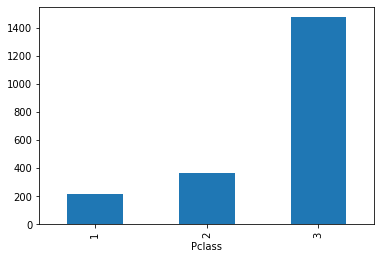

In [22]:
pclass_df.plot(kind = 'bar')

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

In [ ]:
test = titanic_df.groupby('Pclass', 'Survived')
class_survival_df = test['Pclass'].sum()
class_survival_df

In [43]:
titanic_df[["Pclass", "Survived"]].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [25]:
test = titanic_df.groupby(['Pclass', 'Survived'])

In [27]:
class_survival_df = test['Pclass'].sum()
class_survival_df

Pclass  Survived
1       0             80
        1            136
2       0            194
        1            174
3       0           1116
        1            357
Name: Pclass, dtype: int64

In [30]:
unstacked = class_survival_df.unstack()
unstacked

Survived,0,1
Pclass,,
1,80,136
2,194,174
3,1116,357


In [36]:
unstacked["survival rate"] = unstacked[1]/(unstacked[1]+unstacked[0])

In [37]:
unstacked

Survived,0,1,survival rate
Pclass,,,
1,80,136,0.629630
2,194,174,0.472826
3,1116,357,0.242363


### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [53]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [58]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [60]:
titanic_df[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


❓ Plot a barchart of survival frequency of each gender. Who survived the most?

<AxesSubplot:xlabel='Sex'>

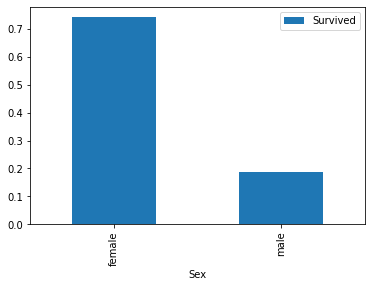

In [62]:
titanic_df[["Sex", "Survived"]].groupby(['Sex']).mean().plot(kind = 'bar')

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [64]:
survivors_df = titanic_df[["Survived", "Sex"]].groupby('Sex').sum()

In [71]:
titanic_df[["PassengerId", "Sex"]].groupby('Sex').count()

,PassengerId
Sex,
female,314
male,577


## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [75]:
children_df = titanic_df[titanic_df["Age"]<18]
children_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


❓ How many children were there in the Titanic?

In [77]:
children_df.shape

(113, 12)

❓ How many children survived?

In [87]:
children_df[['PassengerId','Sex','Survived']].groupby('Survived').count()

,PassengerId,Sex
Survived,,
0,52,52
1,61,61


❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [111]:
c_survival = children_df[['PassengerId','Sex','Survived']].groupby('Sex').agg({
    'Survived':'sum',
    'Sex' :'count'
})
c_survival= c_survival.rename(columns = {"Survived":"Children Surv", "Sex":"Children Total"})
c_survival

,Children Surv,Children Total
Sex,,
female,38,55
male,23,58


In [112]:
adult_df = titanic_df[['PassengerId','Sex','Survived']].groupby('Sex').agg({
    'Survived':'sum',
    'Sex' :'count'
})
adult_df

,Survived,Sex
Sex,,
female,233,314
male,109,577


In [130]:
total = pd.concat((adult_df, c_survival), axis = 1)

In [131]:
total = total.rename(columns={'Sex':'People Total'})

In [132]:
total

,Survived,People Total,Children Surv,Children Total
Sex,,,,
female,233,314,38,55
male,109,577,23,58


In [135]:
total["adult total"] = total["People Total"] - total["Children Total"]

In [137]:
total["adult Surv"] = total["Survived"] - total["Children Surv"]

In [138]:
total

,Survived,People Total,Children Surv,Children Total,adult total,adult Surv
Sex,,,,,,
female,233,314,38,55,259,195
male,109,577,23,58,519,86
